In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

# model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### 초음파로 측정한 광물 예측

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/sonar.csv", header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [20]:
X = df.values[:, 0:60].astype(float)
Y_obj = df.values[:, 60]

In [21]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [22]:
Y_obj

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [23]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [24]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### train - test 분리

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## 과적합 만들기

### model

In [25]:
np.random.seed(3)
tf.random.set_seed(3)

In [26]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
history = model.fit(X, Y, batch_size=5, epochs=200)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
42/42 [==============================] - 0s 665us/step - loss: 0.6795 - accuracy: 0.5913
Epoch 2/200
42/42 [==============================] - 0s 637us/step - loss: 0.6517 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 914us/step - loss: 0.6328 - accuracy: 0.6587
Epoch 4/200
42/42 [==============================] - 0s 817us/step - loss: 

### result

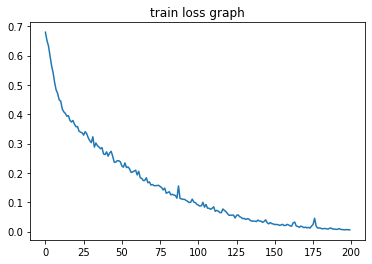

In [30]:
y_loss = history.history["loss"]
x_range = np.arange(len(y_loss))

plt.plot(x_range, y_loss)
plt.title("train loss graph")
plt.show()

In [31]:
print("Accuracy: %.4f" % model.evaluate(X, Y)[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 857us/step - loss: 0.0051 - accuracy: 1.0000
Accuracy: 1.0000


## 과적합 피하기

과적합, overfitting

- 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않는 것을 말합니다.
- epoch이 늘어나면 당연히 train data에 대한 정확도는 상승한다. 그러나 이것으로 전체 모델의 정확도가 올라갔다고 할 수 없다.
- 머신러닝 개발 순서: 충분히 조절하여 가장 나은 모델이 만들어지면, 이를 실생활에 대입하여 활용하는 것

### model

In [35]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [36]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
model.fit(X_train, Y_train, batch_size=5, epochs=130)

Epoch 1/130
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
29/29 [==============================] - 0s 737us/step - loss: 0.7022 - accuracy: 0.4759
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5448
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5586
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6614

In [38]:
print("Test Accuracy: %.4f" % model.evaluate(X_test, Y_test)[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 517us/step - loss: 0.7783 - accuracy: 0.8413
Test Accuracy: 0.8413


## 모델 저장

In [ ]:
model.save("my_model.h5")

In [ ]:
model = load_model("my_model.h5")

## k겹 교차 검증, k-fold cross validation

- 전체 dataset을 k개로 나눈다.
- 이번 step에서 test set을 하나 선정한다.
- 나머지로 model을 학습시키고, test set으로 정확도를 계산한다.
- 모든 k group이 test set을 해본다.

In [41]:
seed = 0
n_fold = 10

np.random.seed(seed)
tf.random.set_seed(seed)
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [42]:
accuracy = []
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
    model.fit(X[train], Y[train], batch_size=5, epochs=100) #, verbose=False)

    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
38/38 [==============================] - 0s 866us/step - loss: 0.2426 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.6578
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.7326
Epoch 4/100
38/38 [==============================] - 0s 920us/step - loss: 0.20

In [43]:
print("%d accuracy" % (n_fold), accuracy)

10 accuracy ['0.7143', '0.8095', '0.7619', '0.9048', '0.8571', '0.7619', '0.8571', '0.7619', '0.9500', '0.8500']
